In [1]:
import pandas as pd

# Load the sales and product data
sales_df = pd.read_csv("sales_data.csv")
product_lookup = pd.read_csv("product_lookup.csv")

# Preview top rows
print(sales_df.head())
print(product_lookup.head())

         Date Region Product_ID  Units_Sold  Revenue
0  2024-06-12  North       P100           9   288.36
1  2024-02-05  North       P117           3   189.43
2  2024-01-09  North       P102           7   216.58
3  2024-06-03  North       P117           7   521.09
4  2024-06-28   West       P107          15   945.51
  Product_ID   Product_Name     Category
0       P100    Red T-shirt      Apparel
1       P101     Blue Jeans      Apparel
2       P102  Running Shoes     Footwear
3       P103       Sneakers     Footwear
4       P104     Smartphone  Electronics


In [2]:
# Merge on Product_ID
merged_df = pd.merge(sales_df, product_lookup, on="Product_ID", how="left")

# Check result
print(merged_df.head())

         Date Region Product_ID  Units_Sold  Revenue   Product_Name  \
0  2024-06-12  North       P100           9   288.36    Red T-shirt   
1  2024-02-05  North       P117           3   189.43         Laptop   
2  2024-01-09  North       P102           7   216.58  Running Shoes   
3  2024-06-03  North       P117           7   521.09         Laptop   
4  2024-06-28   West       P107          15   945.51          Watch   

      Category  
0      Apparel  
1  Electronics  
2     Footwear  
3  Electronics  
4  Accessories  


In [3]:
# Group by Product and calculate total revenue and units sold
product_summary = merged_df.groupby("Product_Name").agg({
    "Units_Sold": "sum",
    "Revenue": "sum"
}).reset_index().sort_values(by="Revenue", ascending=False)

print(product_summary)

     Product_Name  Units_Sold   Revenue
4          Camera         778  45605.24
16          Socks         689  37583.09
12        Sandals         704  37255.18
10    Red T-shirt         578  36990.11
11  Running Shoes         668  36946.23
14     Smartphone         658  36921.71
7      Headphones         640  36837.05
2      Blue Jeans         696  36176.46
6        Earrings         707  35543.13
19          Watch         590  35356.66
5         Charger         631  34926.25
18         Tablet         642  32649.19
13          Scarf         657  31713.77
0        Backpack         564  31597.30
17     Sunglasses         597  31542.19
3           Boots         535  31474.37
8          Jacket         528  31111.70
9          Laptop         556  30786.13
1            Belt         506  29069.49
15       Sneakers         486  21604.15


In [4]:
# Group by Region and Category
region_category_sales = merged_df.groupby(["Region", "Category"]).agg({
    "Revenue": "sum",
    "Units_Sold": "sum"
}).reset_index().sort_values(by="Revenue", ascending=False)

print(region_category_sales)

   Region     Category   Revenue  Units_Sold
14   West  Electronics  67675.49        1237
2    East  Electronics  54173.01        1012
10  South  Electronics  50513.25         916
5   North      Apparel  47259.93         899
6   North  Electronics  45363.82         740
0    East  Accessories  44643.22         770
8   South  Accessories  43475.55         830
9   South      Apparel  42517.48         795
13   West      Apparel  42315.20         706
1    East      Apparel  41482.52         748
3    East     Footwear  40242.61         747
4   North  Accessories  38692.41         725
12   West  Accessories  36297.59         639
7   North     Footwear  31288.45         543
11  South     Footwear  30968.88         563
15   West     Footwear  24779.99         540


In [5]:
# Convert Date to datetime format
merged_df["Date"] = pd.to_datetime(merged_df["Date"])

# Extract year-month as a period
merged_df["Month"] = merged_df["Date"].dt.to_period("M")

# Group by Month
monthly_sales = merged_df.groupby("Month").agg({
    "Revenue": "sum",
    "Units_Sold": "sum"
}).reset_index()

print(monthly_sales)

     Month    Revenue  Units_Sold
0  2024-01  111125.17        1987
1  2024-02   96639.45        1805
2  2024-03  115080.59        2100
3  2024-04  114204.77        2063
4  2024-05  131539.36        2393
5  2024-06  113100.06        2062


In [6]:
pivot = merged_df.pivot_table(
    values="Revenue",
    index="Product_Name",
    columns="Region",
    aggfunc="sum",
    fill_value=0
)

print(pivot)

Region             East     North     South      West
Product_Name                                         
Backpack        6856.81   7611.00  10072.95   7056.54
Belt           10685.26   4307.87  10927.07   3149.29
Blue Jeans      9205.29   8117.84  11027.21   7826.12
Boots          10384.20   6276.00   5640.84   9173.33
Camera         12085.70   9456.15  15997.32   8066.07
Charger        11850.98   7731.85   6779.89   8563.53
Earrings       13628.60   3783.55   9337.13   8793.85
Headphones      7114.86  10014.81   6113.40  13593.98
Jacket          3823.21  12849.88   6907.44   7531.17
Laptop          6681.70   6659.06   7022.12  10423.25
Red T-shirt    12020.65   8837.12   6792.98   9339.36
Running Shoes  13096.20   7295.32  11124.76   5429.95
Sandals        10272.46  12232.62  10311.33   4438.77
Scarf           5439.67   7042.91   8200.76  11030.43
Smartphone      8037.13   7976.05   6930.40  13978.13
Sneakers        6489.75   5484.51   3891.95   5737.94
Socks          10993.70  104

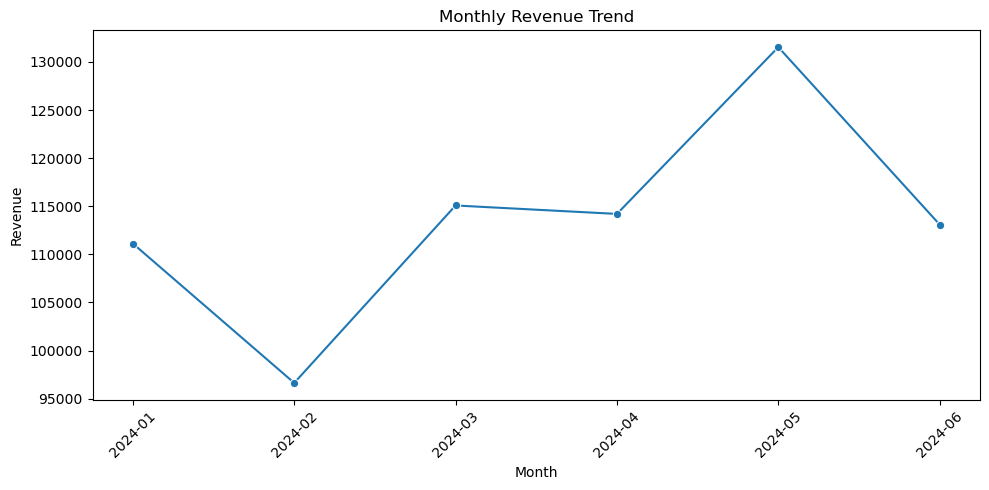

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare monthly data
monthly_sales = merged_df.groupby("Month")["Revenue"].sum().reset_index()
monthly_sales["Month"] = monthly_sales["Month"].astype(str)  # Convert Period to string

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sales, x="Month", y="Revenue", marker="o")
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

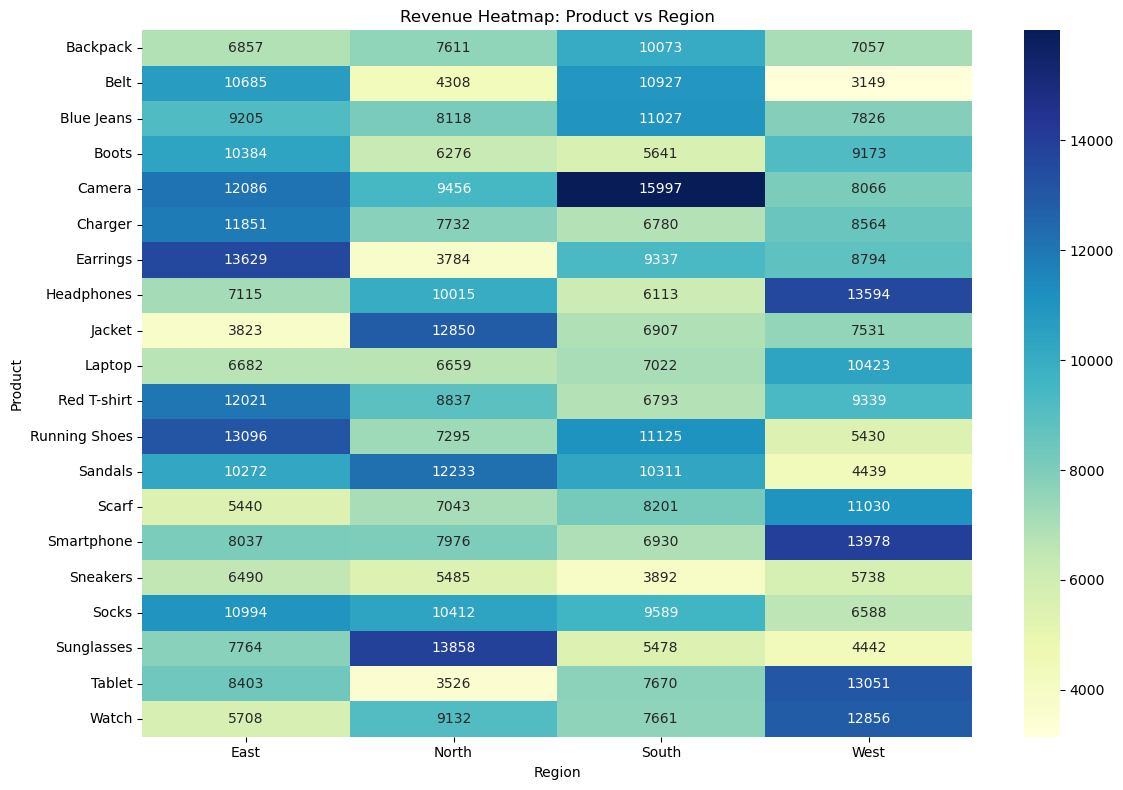

In [8]:
# Create pivot table
pivot = merged_df.pivot_table(
    values="Revenue",
    index="Product_Name",
    columns="Region",
    aggfunc="sum",
    fill_value=0
)

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Revenue Heatmap: Product vs Region")
plt.xlabel("Region")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_10116\111190924.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales, x="Revenue", y="Category", palette="Set2")


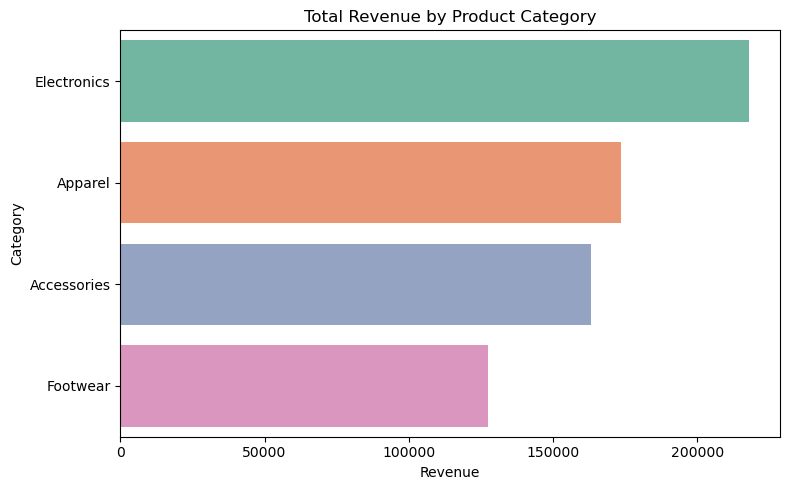

In [9]:
# Prepare data
category_sales = merged_df.groupby("Category")["Revenue"].sum().sort_values(ascending=False).reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=category_sales, x="Revenue", y="Category", palette="Set2")
plt.title("Total Revenue by Product Category")
plt.xlabel("Revenue")
plt.ylabel("Category")
plt.tight_layout()
plt.show()